 # Arhum Ali 
 # 18L-1870
 # PROJECT1_PART C 

In [91]:
import os 
from PIL import Image
import numpy as np
import pandas
import keras
import matplotlib
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras import initializers
from keras.regularizers import l2
from keras import regularizers
import matplotlib.pyplot as plt
import cv2


# initializing variables

In [92]:
x_train=[]
y_train=[]
x_test=[]
y_test=[]

# Loading files in variables, turning them into greyscale images and storing in numpy arrays

In [93]:
for f in os.listdir(os.getcwd()+'/Training/'):
    x = cv2.imread(os.getcwd()+'/Training/'+f,cv2.IMREAD_GRAYSCALE)
    x = cv2.resize(x, (64,64))
    x_train.append(np.array(x))
    if "cat" in f:
        y_train.append(1)
    elif "dog" in f:
        y_train.append(0)
        
for f in os.listdir(os.getcwd()+'/Testing/'):
    x = cv2.imread(os.getcwd()+'/Testing/'+f,cv2.IMREAD_GRAYSCALE)
    x = cv2.resize(x, (64,64))
    x_test.append(np.array(x))
    x = cv2.resize(x, (64,64))
    if "cat" in f:
        y_test.append(1)
    elif "dog" in f:
        y_test.append(0)

# Normalizing

In [94]:
x_train = np.array(x_train).astype('float32')
x_test = np.array(x_test).astype('float32')
x_train /= 255
x_test /= 255

# Increased the number of filters to match with the big dataset 

# Increased regularization via L2 norm and by increasing dropout proportion  

In [101]:
model = Sequential()
model.add(Conv2D(kernel_size=(3,3),filters=64,input_shape=(64, 64,
1),activation="relu",padding="valid"))
model.add(Conv2D(kernel_size=(3,3),filters=64,activation="relu",padding="same"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(kernel_size=(3,3),filters=32,activation="relu",padding="same"))
model.add(Conv2D(kernel_size=(3,3),filters=16,activation="relu",padding="same"))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(Conv2D(kernel_size=(2,2),strides=(2,2),filters=64))
model.add(Flatten())
model.add(Dropout(0.8))
model.add(Dense(128,activation="relu",kernel_regularizer=regularizers.l2(0.1)))
model.add(Dense(1,activation="sigmoid"))


In [105]:
batch_size = 100
epochs = 100

# Using SGD optimizer with 0.03 learning rate and 0.8 momentum

In [106]:
model.compile(loss=keras.losses.mean_squared_error,
              optimizer=keras.optimizers.SGD(lr=0.03,momentum=0.8),
              metrics=['accuracy'])
print(x_train.shape)
x_train = x_train.reshape((x_train.shape)[0],(x_train.shape)[1],(x_train.shape)[2],1)
x_test = x_test.reshape((x_test.shape)[0],(x_test.shape)[1],(x_test.shape)[2],1)
print(x_train.shape)

(18000, 64, 64, 1)
(18000, 64, 64, 1)


Train on 18000 samples, validate on 7000 samples
Epoch 1/100
18000/18000 [==============================] - 80s 4ms/step - loss: 0.2506 - acc: 0.5146 - val_loss: 0.2500 - val_acc: 0.5214
Epoch 2/100
18000/18000 [==============================] - 39s 2ms/step - loss: 0.2502 - acc: 0.5236 - val_loss: 0.2500 - val_acc: 0.5517
Epoch 3/100
18000/18000 [==============================] - 39s 2ms/step - loss: 0.2505 - acc: 0.5297 - val_loss: 0.2510 - val_acc: 0.5269
Epoch 4/100
18000/18000 [==============================] - 39s 2ms/step - loss: 0.2503 - acc: 0.5343 - val_loss: 0.2498 - val_acc: 0.5477
Epoch 5/100
18000/18000 [==============================] - 39s 2ms/step - loss: 0.2510 - acc: 0.5447 - val_loss: 0.2511 - val_acc: 0.5311
Epoch 6/100
18000/18000 [==============================] - 39s 2ms/step - loss: 0.2510 - acc: 0.5441 - val_loss: 0.2499 - val_acc: 0.5556
Epoch 7/100
18000/18000 [==============================] - 39s 2ms/step - loss: 0.2506 - acc: 0.5584 - val_loss: 0.2506 - v

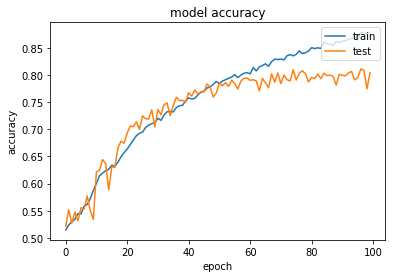

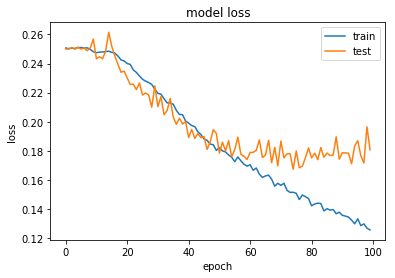

In [107]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# Final Accuracy:
#                            Training:              87.86%
#                            Validation:           80.39%